In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm


from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['mathtext.fontset'] = 'dejavuserif' 

In [2]:
rcParams['figure.figsize'] = (10, 7)
rcParams['figure.dpi'] = 300
rcParams['axes.grid'] = True
rcParams['font.size'] = 14
# rcParams

### угол преломления
$\varphi_1 = 235^\circ 51' 11''$  
$\varphi_2 = 118^\circ 49' 45''$  
$\Delta \varphi = 117^\circ 01' 26''$  
$\theta_D = 180 - \Delta \varphi = 62^\circ 58' 34''$  

$\theta_D = 1.099140$ rad  
$1'' \sim 5 \cdot 10^{-6}$ rad

In [3]:
def dms_to_rad(dd, mm, ss) :
    new_dd = dd + mm / 60 + ss / 3600
    return new_dd * np.pi / 180

In [4]:
def n_from_angle(angle, base_angle=dms_to_rad(62, 58, 34)):
    return np.sin( (angle + base_angle) / 2 ) / np.sin( base_angle / 2)

In [34]:
dms_to_rad(62, 58, 34)
dms_to_rad(0, 0, 30)

0.0001454441043328608

In [37]:
with open(r'angles.csv') as f:
    angles = pd.read_csv(f)

for i in range(8):
    angles.d[i] -= 180
    angles.m[i] -= 1
    
rads = pd.concat([angles.n, dms_to_rad(angles.d, angles.m, angles.s), pd.Series([579.1, 577.0, 546.1, 491.6, 435.8, 404.7, 690.7, 623.4])], axis=1)
rads.rename(columns={0:"angle", 1:"length"}, inplace=True)
rads['cri'] = n_from_angle(rads.angle)

for i in range(8):
    print(rads.iloc[i, 0], ' '.join(map(str, angles.iloc[i, 1:])), round(rads.iloc[i, 1], 4), round(rads.iloc[i, 3], 4), sep=" &\t", end=' \\\\\n')

rads.sort_values("length", axis=0, ascending=False, inplace=True, ignore_index=True)


rads

1 &	51 57 24 &	0.9068 &	1.6141 \\
2 &	51 58 49 &	0.9072 &	1.6143 \\
3 &	52 18 55 &	0.9131 &	1.6173 \\
4 &	53 5 45 &	0.9267 &	1.6243 \\
5 &	54 17 41 &	0.9476 &	1.6348 \\
6 &	55 15 46 &	0.9645 &	1.6431 \\
7 &	51 6 59 &	0.8921 &	1.6065 \\
8 &	51 35 1 &	0.9003 &	1.6107 \\


,n,angle,length,cri
0,7,0.892149,690.7,1.606503
1,8,0.900304,623.4,1.610736
2,1,0.906815,579.1,1.614096
3,2,0.907227,577.0,1.614308
4,3,0.913074,546.1,1.617311
5,4,0.926697,491.6,1.624252
6,5,0.947622,435.8,1.634767
7,6,0.964517,404.7,1.643126


$ n = \dfrac{\sin{\frac{\alpha + \varphi}{2}}}{\sin{\frac{\alpha}{2}}} $
$ \delta n = \frac{dn}{d\varphi}d\varphi = \frac{1}{2}\dfrac{\cos{\frac{\alpha + \varphi}{2}}}{\sin{\frac{\alpha}{2}}} d\varphi $

[-1.5977710e-04  1.7054454e+00] [1.24081660e-05 6.33077004e-03]


7.27220521664304e-05

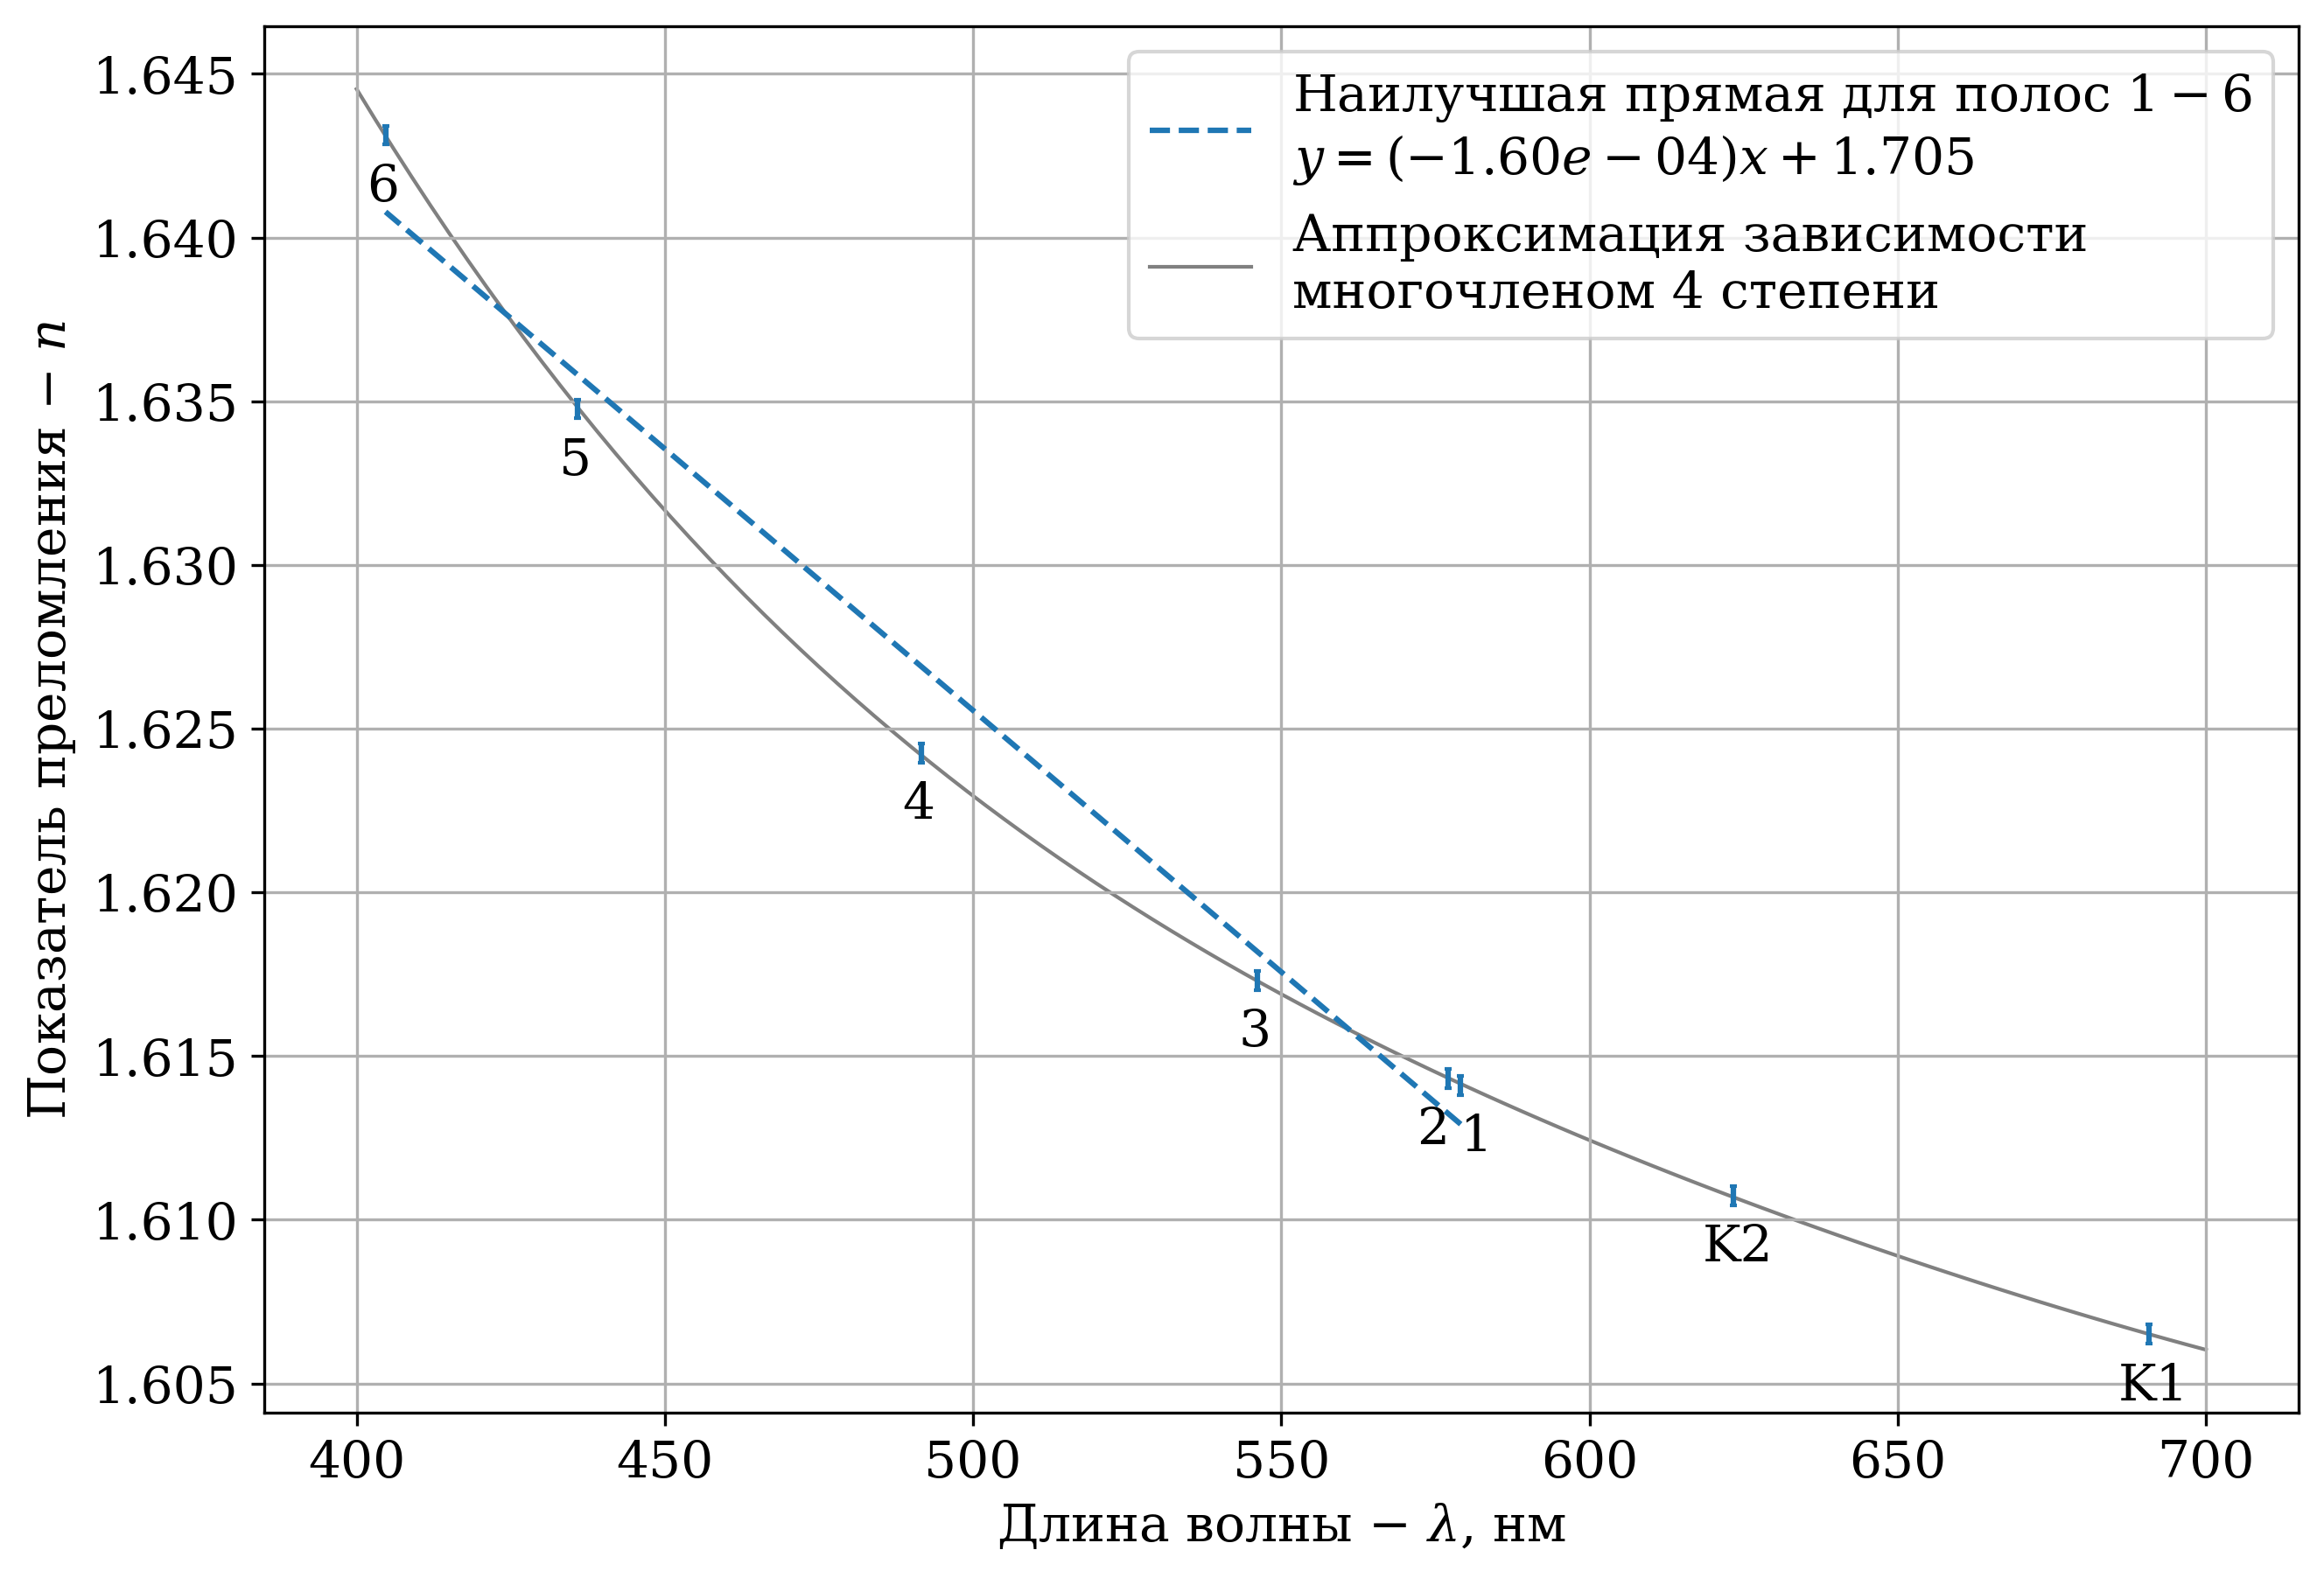

In [66]:
err = dms_to_rad(0,1,0)
fig = plt.figure()

# plt.scatter(rads.length, rads.cri, marker='.')
plt.errorbar(rads.length, rads.cri, err, 0, 'none',capsize=1)
texts = ["K1","K2","1","2","3","4","5","6"]
plt.text(rads.length[0] - 5, rads.cri[0] - 0.002, texts[0])
plt.text(rads.length[1] - 5, rads.cri[1] - 0.002, texts[1])
plt.text(rads.length[2], rads.cri[2] - 0.002, texts[2])
plt.text(rads.length[3] - 5, rads.cri[3] - 0.002, texts[3])
plt.text(rads.length[4] - 3, rads.cri[4] - 0.002, texts[4])
plt.text(rads.length[5] - 3, rads.cri[5] - 0.002, texts[5])
plt.text(rads.length[6] - 3, rads.cri[6] - 0.002, texts[6])
plt.text(rads.length[7] - 3, rads.cri[7] - 0.002, texts[7])

plt.xlabel(r"Длина волны $-$ $\lambda$, нм")
plt.ylabel(r"Показатель преломления $-$ $n$")

xarg = np.polyfit(rads.length, rads.cri, 4)
xf = np.poly1d(xarg)


a, b = 2,8

arg, err = np.polyfit(rads.length[a:b], rads.cri[a:b], 1, cov=True)
f = np.poly1d(arg)
plt.plot(rads.length[a:b], f(rads.length[a:b]), ls='--', label="Наилучшая прямая для полос $1-6$\n"
                                                                   "$y = ({:.2e})  x + {:.3f}$".format(arg[0], arg[1]))

x = np.linspace(400, 700, 101)
plt.plot(x, xf(x), lw=1, zorder=1, color="grey", label="Аппроксимация зависимости\nмногочленом 4 степени")
print(arg, np.sqrt(err.diagonal()))

plt.legend()
plt.savefig("plot1.png")
dms_to_rad(0, 0, 15)


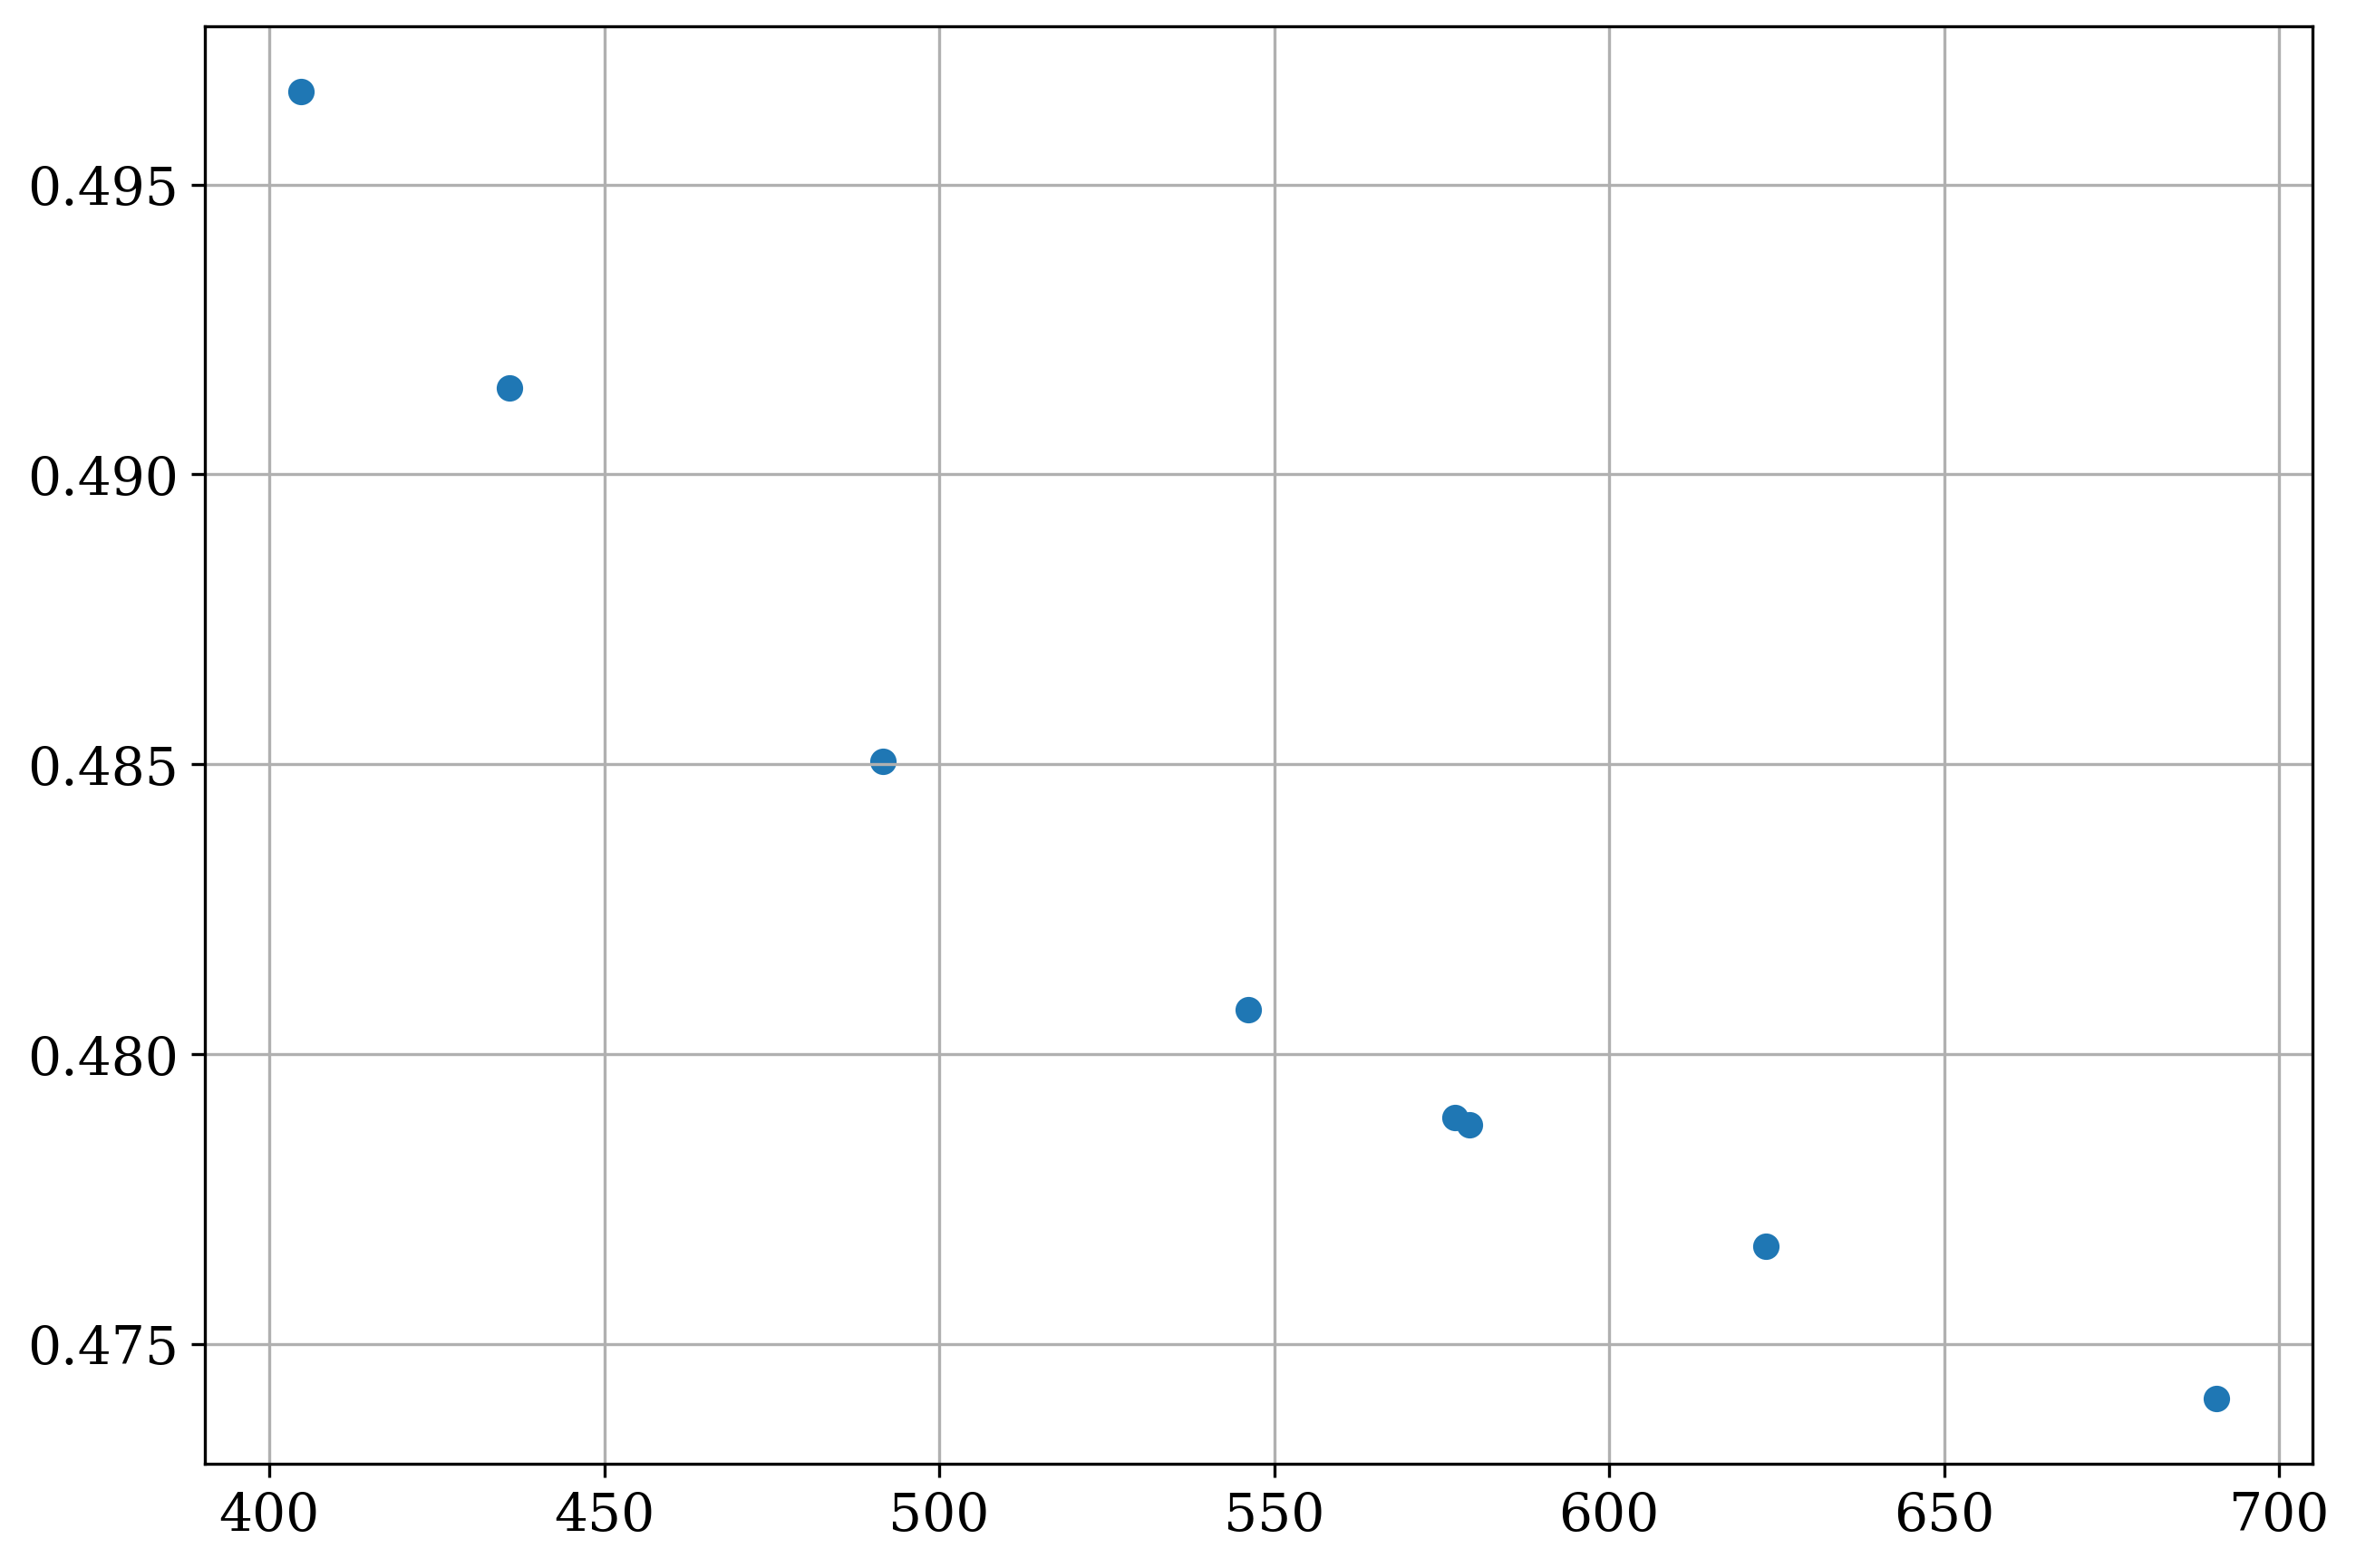

In [49]:
plt.scatter(rads.length, np.log(rads.cri))